# H0 : weather,temp,season,humidity,and windspeed do NOT have an effect on num of bike rentals

# Ha : they do

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
import scipy as sp
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
import datetime as dt

plt.style.use('seaborn')
sns.set(style="white")

In [2]:
df = pd.read_pickle('bike_dataset')

In [3]:
# df.head()

In [4]:
def columnize(df, column, new_vals, new_col):
    list1 = df[column].unique()
    dict1 = dict(zip(list1,new_vals))
    df[new_col] = df[column].map(dict1)
    df = pd.concat([df, pd.get_dummies(df[new_col])], 1)
    return df

In [5]:
#df = columnize(df, 'weathersit', ['clear', 'misty', 'light_storm', 'heavy_storm'],'weather')

In [6]:
df['dteday'] = pd.to_datetime(df['dteday'])
df['dteday'] = df['dteday'].map(dt.datetime.toordinal)

In [7]:
df = df[df.cnt>100]


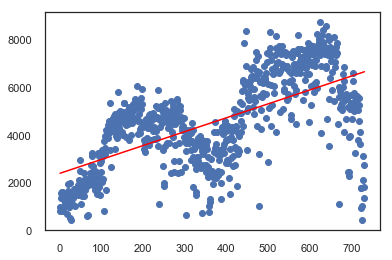

(2380.287482388977, array([[0.        , 5.82680902]]))

In [18]:
x=df.instant.values.reshape(-1,1)
y=df.cnt.values.reshape(-1,1)

# Regression
poly = PolynomialFeatures(degree=1)
x_poly = poly.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)

predictions = model.predict(x_poly)

# Plotting
plt.scatter(df['instant'], df['cnt'])
plt.plot(df['instant'],predictions,c='red')
plt.show()

model.intercept_[0], model.coef_


In [27]:
df['trend']= predictions

In [30]:
df['detrend']=df['cnt']-df['trend']

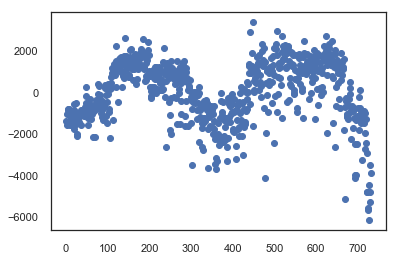

In [31]:
plt.scatter(df['instant'], df['detrend'])


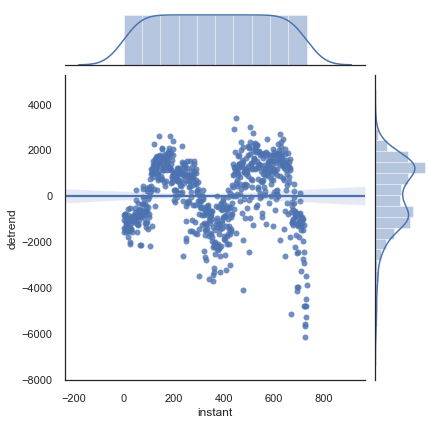

In [39]:
sns.jointplot(x='instant', y='detrend', data=df, kind="reg")

In [9]:
def resid(x,y_actual):
    return (model.intercept_[0]+sum([model.coef_[0][i]*x**i for i in range(len(model.coef_[0]))])) -  y_actual

In [10]:
df['resids'] = resid(df['instant'], df['cnt'])
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,cnt,weather,clear,light_storm,misty,fall,spring,summer,winter,resids
0,1,719163,winter,0,1,0,6,0,2,0.344167,...,985,clear,1,0,0,0,0,0,1,-950.111397
1,2,719163,winter,0,1,0,0,0,2,0.363478,...,801,clear,1,0,0,0,0,0,1,-714.400618
2,3,719163,winter,0,1,0,1,1,1,0.196364,...,1349,misty,0,0,1,0,0,0,1,-1211.043852
3,4,719163,winter,0,1,0,2,1,1,0.200000,...,1562,misty,0,0,1,0,0,0,1,-1373.041272
4,5,719163,winter,0,1,0,3,1,1,0.226957,...,1600,misty,0,0,1,0,0,0,1,-1360.393026
5,6,719163,winter,0,1,0,4,1,1,0.204348,...,1606,misty,0,0,1,0,0,0,1,-1316.099243
6,7,719163,winter,0,1,0,5,1,2,0.196522,...,1510,clear,1,0,0,0,0,0,1,-1170.160031
7,8,719163,winter,0,1,0,6,0,2,0.165000,...,959,clear,1,0,0,0,0,0,1,-569.575477
8,9,719163,winter,0,1,0,0,0,1,0.138333,...,822,misty,0,0,1,0,0,0,1,-383.345648
9,10,719163,winter,0,1,0,1,1,1,0.150833,...,1321,misty,0,0,1,0,0,0,1,-833.470590


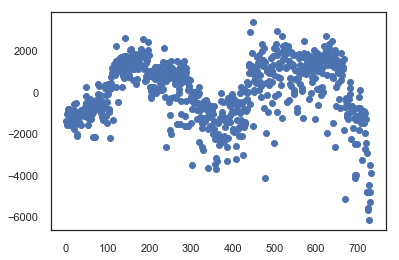

In [46]:
plt.scatter(df['instant'], df['detrend'])
# x = np.linspace(0,730,730)
# y = np.array([0 for i in range(len(x))])
# plt.plot(x,y, c='red')

In [77]:
def checkresiduals(df, target, sm_model):
    # checking for our model - Homoscedasticity,  Independence of residuals
    pred_val = sm_model.fittedvalues.copy()
    true_val = df[target].values.copy()
    residual = true_val - pred_val

    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
#     fig, ax = plt.subplots(figsize=(8, 6))
    ax1.hist(residual, density=True, bins=30)
    ax2.scatter(df[target],residual)
    ax2.set_title('Residual Scatterplot')
    plt.show()

In [190]:
df = df.drop('resids',axis=1)

In [253]:
interms = df.copy()

In [255]:
interms = interms.drop(['dteday','season','yr','mnth','weekday','atemp','weathersit','casual','registered','cnt','weather','trend','detrend'],axis=1)

In [256]:
interms.columns

Index(['instant', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'clear',
       'light_storm', 'misty', 'fall', 'spring', 'summer', 'winter'],
      dtype='object')

In [257]:
poly1 = PolynomialFeatures(3)
poly_data = poly1.fit_transform(interms)
poly_columns = poly1.get_feature_names(list(interms.columns))
poly_features = pd.DataFrame(poly_data, columns=poly_columns, index=interms.index)

In [258]:
new_cols = list(poly_features.columns)

In [259]:
poly_features = poly_features.drop([name for name in new_cols if '^' in name],axis=1)

In [260]:
poly_features = poly_features.loc[:, (poly_features != 0).any(axis=0)]

In [261]:
poly_features

,1,instant,holiday,workingday,temp,hum,windspeed,clear,light_storm,misty,...,windspeed clear summer,windspeed clear winter,windspeed light_storm fall,windspeed light_storm spring,windspeed light_storm summer,windspeed light_storm winter,windspeed misty fall,windspeed misty spring,windspeed misty summer,windspeed misty winter
0,1.0,1.0,0.0,0.0,0.344167,0.805833,0.160446,1.0,0.0,0.0,...,0.0,0.160446,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
1,1.0,2.0,0.0,0.0,0.363478,0.696087,0.248539,1.0,0.0,0.0,...,0.0,0.248539,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
2,1.0,3.0,0.0,1.0,0.196364,0.437273,0.248309,0.0,0.0,1.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.248309
3,1.0,4.0,0.0,1.0,0.200000,0.590435,0.160296,0.0,0.0,1.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.160296
4,1.0,5.0,0.0,1.0,0.226957,0.436957,0.186900,0.0,0.0,1.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.186900
5,1.0,6.0,0.0,1.0,0.204348,0.518261,0.089565,0.0,0.0,1.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.089565
6,1.0,7.0,0.0,1.0,0.196522,0.498696,0.168726,1.0,0.0,0.0,...,0.0,0.168726,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
7,1.0,8.0,0.0,0.0,0.165000,0.535833,0.266804,1.0,0.0,0.0,...,0.0,0.266804,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
8,1.0,9.0,0.0,0.0,0.138333,0.434167,0.361950,0.0,0.0,1.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.361950
9,1.0,10.0,0.0,1.0,0.150833,0.482917,0.223267,0.0,0.0,1.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.223267


In [341]:
final_df = pd.concat([df, poly_features],axis=1)
final_df = final_df.drop('dteday',axis=1)

In [342]:
final_df.columns = [name.replace(' ','_') for name in final_df.columns]

In [343]:
final_df = final_df.loc[:,~final_df.columns.duplicated()]

In [344]:
final_df= final_df.select_dtypes(exclude=['object'])

In [345]:
final_df = final_df.drop([name for name in list(final_df.columns) if 'instant' in name],axis=1)

In [346]:
final_df = final_df.drop([name for name in list(final_df.columns) if 'winter' in name],axis=1)

In [347]:
final_df = final_df.drop([name for name in list(final_df.columns) if 'light_storm' in name],axis=1)

In [348]:
final_df = final_df.drop([name for name in list(final_df.columns) if 'weekday' in name or 'yr' in name],axis=1)

In [349]:
final_df = final_df.drop([name for name in list(final_df.columns) if 'mnth' in name or 'weathersit' in name or 'atemp' in name],axis=1)

In [350]:
final_df = final_df.drop([name for name in list(final_df.columns) if 'cnt' in name],axis=1)

In [351]:
final_df = final_df.drop([name for name in list(final_df.columns) if 'casual' in name],axis=1)

In [395]:
final_df = final_df.drop([name for name in list(final_df.columns) if 'registered' in name or 'windspeed' in name],axis=1)

In [396]:
workingivs = list(final_df.columns)

In [397]:
workingivs.remove('detrend')

In [398]:
IVs = ''.join(name+'+' for name in workingivs).strip('+')

In [437]:
lr_model = ols(formula=f'detrend~{IVs}', data=final_df).fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                detrend   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     28.89
Date:                Thu, 22 Aug 2019   Prob (F-statistic):          1.36e-164
Time:                        16:15:58   Log-Likelihood:                -5823.0
No. Observations:                 730   AIC:                         1.180e+04
Df Residuals:                     651   BIC:                         1.217e+04
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -2.459e+04   2.95e+04     -0.833      0.405   -8.25e+04    3.34e+04
holiday                  3336.6091   6322.069      0.528      0.598   -9077.498    1.58e+04
workingday                151.1671   1.33e+04      0.011      0.991   -2.61e+04    2.64e+04
temp                     1.448e+04    8.5e+04      0.171      0.865   -1.52e+05    1.81e+05
hum                      2.953e+04   4.66e+04      0.634      0.526   -6.19e+04    1.21e+05
clear                    2.532e+04   2.95e+04      0.858      0.391   -3.26e+04    8.32e+04
misty                    2.165e+04   2.95e+04      0.734      0.463   -3.63e+04    7.96e+04
fall                     1.058e+04   3.39e+04      0.312      0.755    -5.6e+04    7.72e+04
spring                  -7722.4085   2.69e+04     -0.287      0.774   -6.05e+04    4.51e+04
summer                   1.008e+04   7322.203      1.376      0.169   -4298.981    2.45e+04
trend                      -0.1465      0.027     -5.498      0.000      -0.199      -0.094
holiday_temp            -2016.3969   2.19e+04     -0.092      0.927   -4.49e+04    4.09e+04
holiday_hum             -5837.4050   1.19e+04     -0.491      0.624   -2.92e+04    1.75e+04
holiday_clear            8673.1606   4224.487      2.053      0.040     377.895     1.7e+04
holiday_misty           -5336.5515   3867.159     -1.380      0.168   -1.29e+04    2257.059
holiday_fall             3222.0708   5378.771      0.599      0.549   -7339.763    1.38e+04
holiday_spring           3162.2818   9765.288      0.324      0.746    -1.6e+04    2.23e+04
holiday_summer            930.6275   1537.733      0.605      0.545   -2088.888    3950.143
workingday_temp         -1.015e+04   4.96e+04     -0.205      0.838   -1.08e+05    8.72e+04
workingday_hum          -3429.1134   8594.483     -0.399      0.690   -2.03e+04    1.34e+04
workingday_clear          878.0551   1.33e+04      0.066      0.947   -2.53e+04     2.7e+04
workingday_misty          867.3315   1.33e+04      0.065      0.948   -2.53e+04     2.7e+04
workingday_fall          9957.1487   3555.978      2.800      0.005    2974.578    1.69e+04
workingday_spring        1.216e+04   5299.690      2.294      0.022    1749.059    2.26e+04
workingday_summer       -3046.1945   1686.092     -1.807      0.071   -6357.029     264.640
temp_hum                -1.307e+04   1.45e+05     -0.090      0.928   -2.98e+05    2.72e+05
temp_clear              -1.935e+04   8.49e+04     -0.228      0.820   -1.86e+05    1.47e+05
temp_misty              -8207.7266   8.49e+04     -0.097      0.923   -1.75e+05    1.58e+05
temp_fall                3.016e+04   1.17e+04      2.573      0.010    7142.419    5.32e+04
temp_spring              4.651e+04   3.98e+04      1.167      0.243   -3.17e+04    1.25e+05
temp_summer             -1.438e+04   7708.342  

In [439]:
ps = pd.DataFrame(lr_model.pvalues, columns=['pvalue'])

In [449]:
ps[ps['pvalue']>.9].transpose().columns

Index(['workingday', 'holiday_temp', 'workingday_clear', 'workingday_misty',
       'temp_hum', 'temp_misty', 'holiday_temp_hum', 'holiday_temp_misty',
       'holiday_temp_fall', 'temp_hum_misty'],
      dtype='object')

In [531]:
def refine_model(model, old_ivs, pval):
    pdf = pd.DataFrame(model.pvalues, columns=['pvalue'])
    removers = list(pdf[pdf['pvalue']>pval].transpose().columns)
    new_ivs = [iv for iv in old_ivs if iv not in removers]
    IVs = ''.join(name+'+' for name in new_ivs).strip('+')
    print(len(new_ivs))
    new_model = ols(formula=f'detrend~{IVs}', data=final_df).fit()
    return new_model, new_ivs, round(new_model.pvalues.max(),1)

In [ ]:
for i in range(10):
    if 

In [551]:
ref1 = refine_model(lr_model,workingivs,.9)
ref2 = refine_model(ref1[0], ref1[1],.9)
ref3 = refine_model(ref2[0], ref2[1],.8)
ref4 = refine_model(ref3[0], ref3[1],.6)
ref5 = refine_model(ref4[0], ref4[1],.6)
ref6 = refine_model(ref5[0], ref5[1], ref5[2]-.1)
ref7 = refine_model(ref6[0], ref6[1], ref6[2]-.1)
ref8 = refine_model(ref7[0], ref7[1], ref7[2]-.1)
ref9 = refine_model(ref8[0], ref8[1], ref8[2]-.1)
ref10 = refine_model(ref9[0], ref9[1], ref9[2]-.1)
refa = refine_model(ref10[0], ref10[1], ref10[2]-.1)
refb = refine_model(refa[0], refa[1], refa[2]-.1)
refc = refine_model(refb[0], refb[1], refb[2]-.1)
refd = refine_model(refc[0], refc[1], refc[2]-.1)

82
80
78
77
76
72
71
70
65
64
60
59
57
56


In [579]:
refe = refine_model(refd[0], refd[1], refd[2]-.1)
refe[2]
reff = refine_model(refe[0], refe[1], .09)
final_model = refine_model(reff[0], reff[1], .05)
final_model[0].summary()

53
52
51


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                detrend   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     48.32
Date:                Thu, 22 Aug 2019   Prob (F-statistic):          9.51e-185
Time:                        17:31:30   Log-Likelihood:                -5833.9
No. Observations:                 730   AIC:                         1.176e+04
Df Residuals:                     682   BIC:                         1.198e+04
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -8713.6658   1259.760     -6.917      0.000   -1.12e+04   -6240.192
holiday                  3478.0013   1105.813      3.145      0.002    1306.795    5649.208
temp                     3838.1646    716.589      5.356      0.000    2431.180    5245.150
hum                      7117.9269   1817.021      3.917      0.000    3550.300    1.07e+04
clear                    1.013e+04   1711.870      5.917      0.000    6767.714    1.35e+04
misty                    6891.9595   1245.158      5.535      0.000    4447.155    9336.763
spring                  -2206.2087    664.934     -3.318      0.001   -3511.773    -900.645
summer                   9907.1382   1636.885      6.052      0.000    6693.199    1.31e+04
trend                      -0.1530      0.026     -5.985      0.000      -0.203      -0.103
holiday_hum             -6570.1792   1763.751     -3.725      0.000      -1e+04   -3107.146
holiday_clear            7852.5308   2103.993      3.732      0.000    3721.449     1.2e+04
holiday_misty           -4374.5295   1267.200     -3.452      0.001   -6862.611   -1886.448
holiday_fall             1020.6610    348.076      2.932      0.003     337.232    1704.090
workingday_hum          -1863.2411    839.299     -2.220      0.027   -3511.161    -215.321
workingday_fall          6843.2897   1456.472      4.699      0.000    3983.581    9702.998
workingday_spring        4627.8467   1137.104      4.070      0.000    2395.201    6860.492
workingday_summer       -3470.5160   1466.494     -2.367      0.018   -6349.902    -591.130
temp_clear              -7392.1788   3177.944     -2.326      0.020   -1.36e+04   -1152.450
temp_fall                2.244e+04   3100.638      7.238      0.000    1.64e+04    2.85e+04
temp_spring              1.039e+04   1705.554      6.092      0.000    7041.553    1.37e+04
temp_summer             -1.387e+04   1909.161     -7.263      0.000   -1.76e+04   -1.01e+04
hum_clear               -1.347e+04   2530.017     -5.324      0.000   -1.84e+04   -8503.099
hum_misty               -7726.7267   1888.334     -4.092      0.000   -1.14e+04   -4019.080
hum_summer              -2008.8574    928.018     -2.165      0.031   -3830.974    -186.741
clear_fall              -9053.2593   1892.182     -4.785      0.000   -1.28e+04   -5338.058
clear_summer             7997.6822   2123.435      3.766      0.000    3828.428    1.22e+04
misty_fall              -8608.2381   1455.428     -5.915      0.000   -1.15e+04   -5750.580
misty_summer             2514.8358   1034.336      2.431      0.015     483.971    4545.701
holiday_hum_clear       -1.319e+04   3330.436     -3.961      0.000   -1.97e+04   -6654.006
holiday_hum_misty        6622.9671   2074.257      3.193      0.001    2550.269    1.07e+04
holiday_hum_summer       4358.6607   1046.506  

In [601]:
corrtest = final_df[list(pd.DataFrame(final_model[0].pvalues).transpose().columns)[1:]]

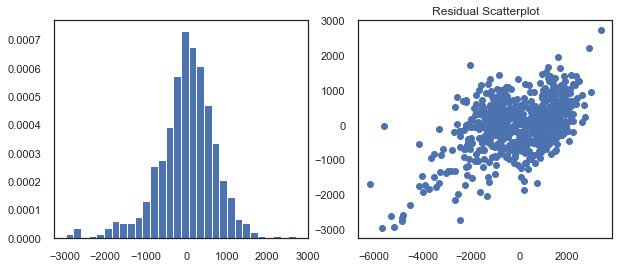

In [581]:
checkresiduals(final_df, 'detrend', final_model[0])

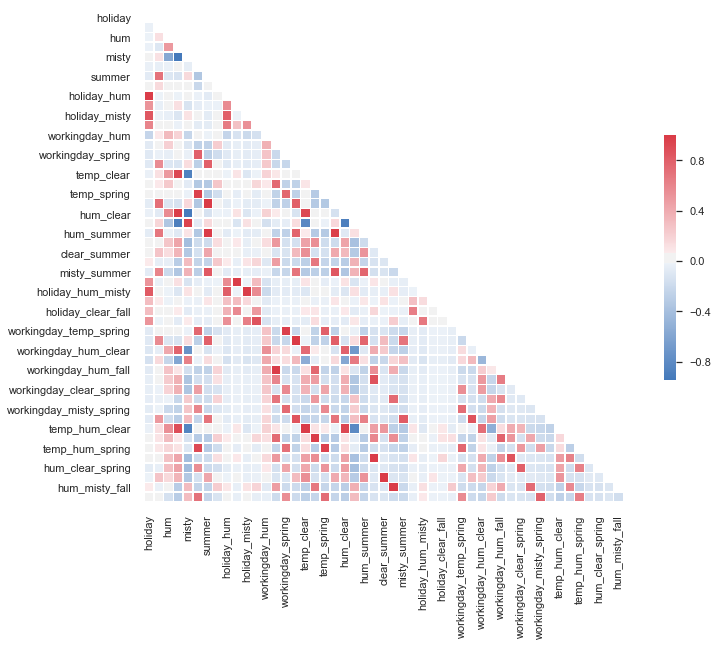

In [602]:
def CorrMtx(df, dropDuplicates = True):

    # Your dataset is already a correlation matrix.
    # If you have a dateset where you need to include the calculation
    # of a correlation matrix, just uncomment the line below:
    # df = df.corr()

    # Exclude duplicate correlations by masking uper right values
    if dropDuplicates:    
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True

    # Set background color / chart style
    sns.set_style(style = 'white')

    # Set up  matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Add diverging colormap from red to blue
    cmap = sns.diverging_palette(250, 10, as_cmap=True)

    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sns.heatmap(df, mask=mask, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
    else:
        sns.heatmap(df, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)


CorrMtx(corrtest.corr(), dropDuplicates = True)

In [93]:
df.dtypes

instant          int64
dteday           int64
season          object
yr               int64
mnth             int64
holiday          int64
weekday          int64
workingday       int64
weathersit       int64
temp           float64
atemp          float64
hum            float64
windspeed      float64
casual           int64
registered       int64
cnt              int64
weather         object
clear            uint8
light_storm      uint8
misty            uint8
fall             uint8
spring           uint8
summer           uint8
winter           uint8
resids         float64
dtype: object

In [14]:
df.describe()

,instant,dteday,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,...,registered,cnt,clear,light_storm,misty,fall,spring,summer,winter,resids
count,730.000000,730.0,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,7.300000e+02
mean,365.586301,719163.0,0.500000,6.515068,0.028767,3.000000,0.683562,1.393151,0.495461,0.474402,...,3661.153425,4510.489041,0.338356,0.027397,0.634247,0.247945,0.252055,0.252055,0.247945,-5.447001e-12
std,211.013951,0.0,0.500343,3.451871,0.167266,2.004795,0.465405,0.542015,0.183165,0.163068,...,1555.499166,1931.408300,0.473475,0.163350,0.481971,0.432116,0.434490,0.434490,0.432116,1.064120e+03
min,1.000000,719163.0,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,...,416.000000,431.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.696119e+03
25%,183.250000,719163.0,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.336875,0.337794,...,2502.250000,3169.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.945124e+02
50%,365.500000,719163.0,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,0.499166,0.487364,...,3664.500000,4548.500000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-1.151855e+02
75%,547.750000,719163.0,1.000000,9.750000,0.000000,5.000000,1.000000,2.000000,0.655625,0.608916,...,4783.250000,5966.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,5.726303e+02
max,731.000000,719163.0,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,...,6946.000000,8714.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.331847e+03


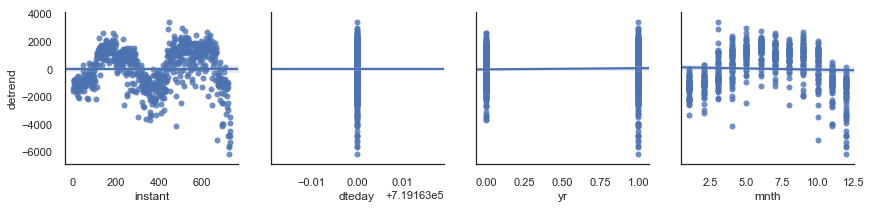

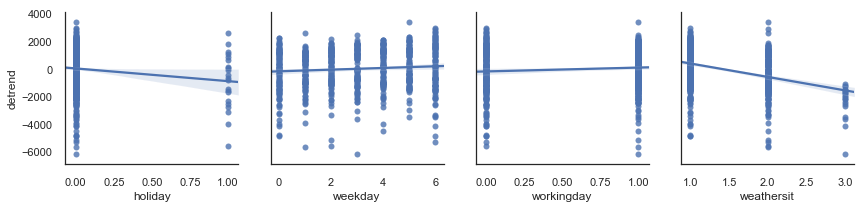

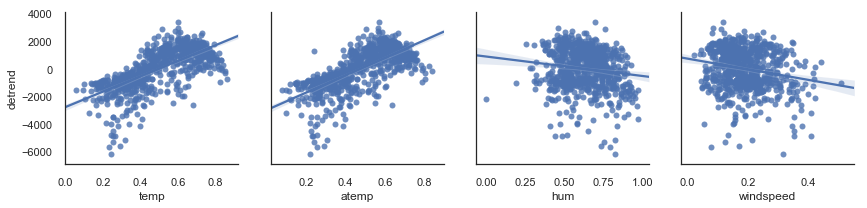

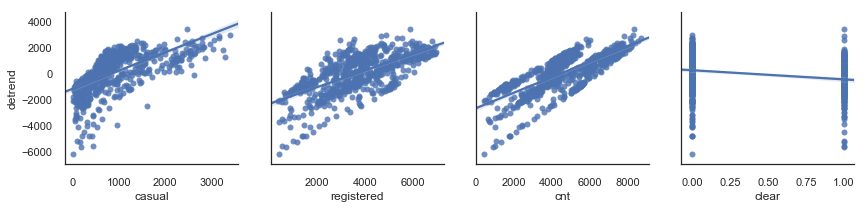

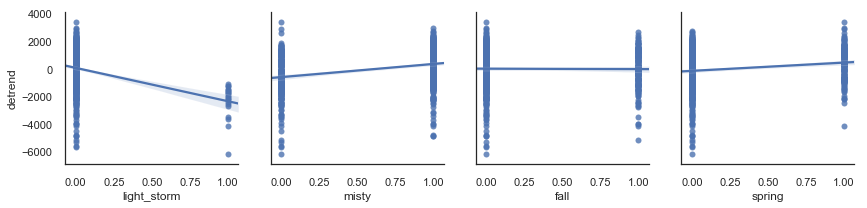

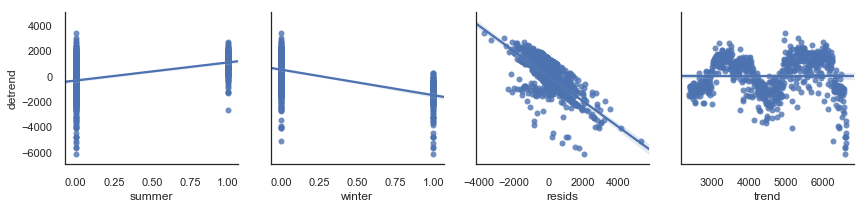

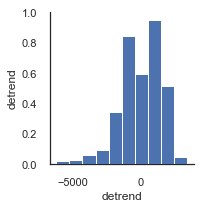

In [41]:
feats = list(df.select_dtypes(include=['int64','float64','uint8']).columns)
n = 4
row_groups= [feats[i:i+n] for i in range(0, len(feats), n)]
for i in row_groups:
    pp = sns.pairplot(data=df, y_vars=['detrend'], x_vars=i, kind="reg", height=3)